In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns;  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
%matplotlib inline


## Data exploration

In [2]:
train = pd.read_csv("./train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


Train data start from 2010-02-05, end with 2012-10-26.

In [4]:
train.describe() 

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
train.isnull().mean()*100 

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64

In [6]:
features = pd.read_csv("./features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
features.describe() 

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [8]:
features_null = features.isnull().mean()*100 
features_null

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

Text(0, 0.5, 'missing values %')

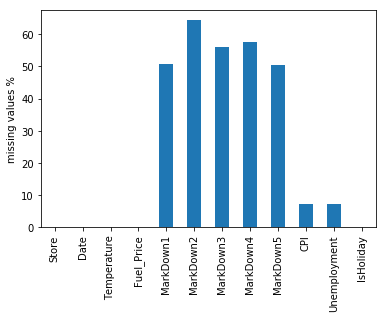

In [9]:
features_null.plot(kind='bar')   
plt.ylabel('missing values %')

MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment columns have missing data.

In [10]:
stores = pd.read_csv("./stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
stores.groupby('Type').count()['Store']

Type
A    22
B    17
C     6
Name: Store, dtype: int64

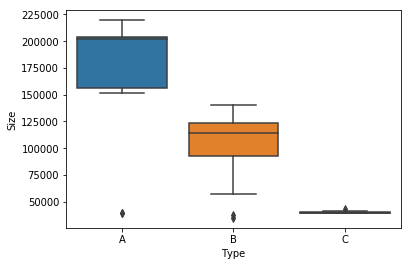

In [12]:
sns.boxplot(x='Type', y='Size', data=stores)

There are 22 Type A stores, 17 Type B stores and 6 Type C stores. Store size Type A > Type B > Type C.

Merge train and features dataset.

In [13]:
train_features = pd.merge(train, features, on = ['Store', 'Date', 'IsHoliday'], how='left')

In [14]:
train_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


Further merge train_features dataset with stores dataset..

In [15]:
dataset = train_features.merge(stores, how = 'left')
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [16]:
dataset.shape

(421570, 16)

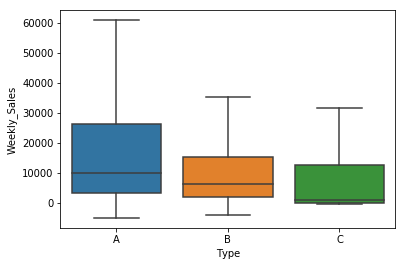

In [17]:
sns.boxplot(x='Type', y='Weekly_Sales', data=dataset, showfliers=False)

Text(0, 0.5, 'Mean Weekly Sales / Size')

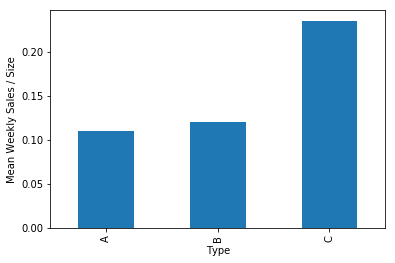

In [18]:
group_by_type = dataset.groupby('Type')
sales_mean_norm = group_by_type.Weekly_Sales.mean() /group_by_type.Size.mean()
sales_mean_norm.plot(kind = 'bar')
plt.ylabel('Mean Weekly Sales / Size')

From above results we can see type A > type B > type C store on size and weekly sales. However, type C stores have higher weekly sales/size.

Data preprocessing

In [19]:
pd.DataFrame(dataset.dtypes)

,0
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


Convert Date column from object type to datatime.

In [20]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Week'] = dataset['Date'].dt.week
dataset['day'] = dataset['Date'].dt.day
del dataset['Date']

Use one hot encoding to convert categorical values to numerical values. 

In [21]:
dataset['Type']=LabelEncoder().fit_transform(dataset['Type'])
dataset['IsHoliday']=LabelEncoder().fit_transform(dataset['IsHoliday'])

In [22]:
column_names = dataset.columns
column_names

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week', 'day'],
      dtype='object')

Creat totalMarkDown and has MarkDown features.

In [25]:
dataset['totalMarkDown'] =   dataset['MarkDown1'] + dataset['MarkDown2']\
                            + dataset['MarkDown3']+ dataset['MarkDown4']+ dataset['MarkDown5']     

In [26]:
dataset['hasMarkDown'] = dataset['totalMarkDown'].apply(lambda x :  1 if x >1 else   0)

In [27]:
percent_hasMarkDown = dataset['hasMarkDown'].sum()/dataset.shape[0]*100
percent_hasMarkDown

23.022511089498778

23% percent of time Walmart stores have one or more mark downs.

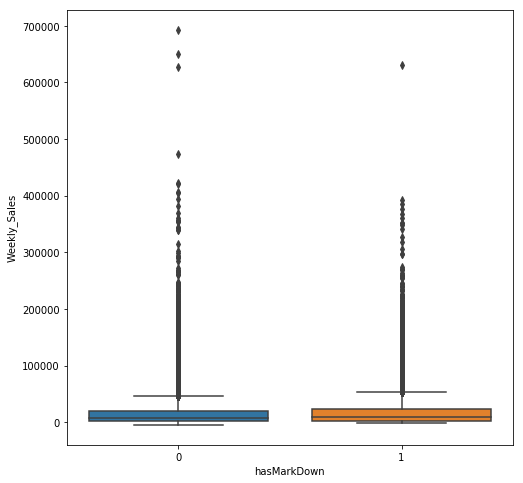

In [28]:
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='hasMarkDown', y='Weekly_Sales', data=dataset)

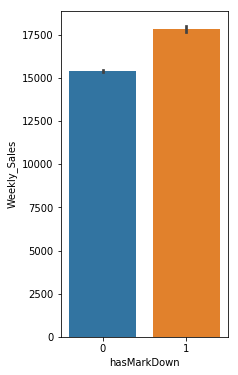

In [29]:
f, ax = plt.subplots(figsize=(3, 6))
fig = sns.barplot(x='hasMarkDown', y='Weekly_Sales', data=dataset)

Above figure shows that hasMarkDown weeks have higher weekly sales.

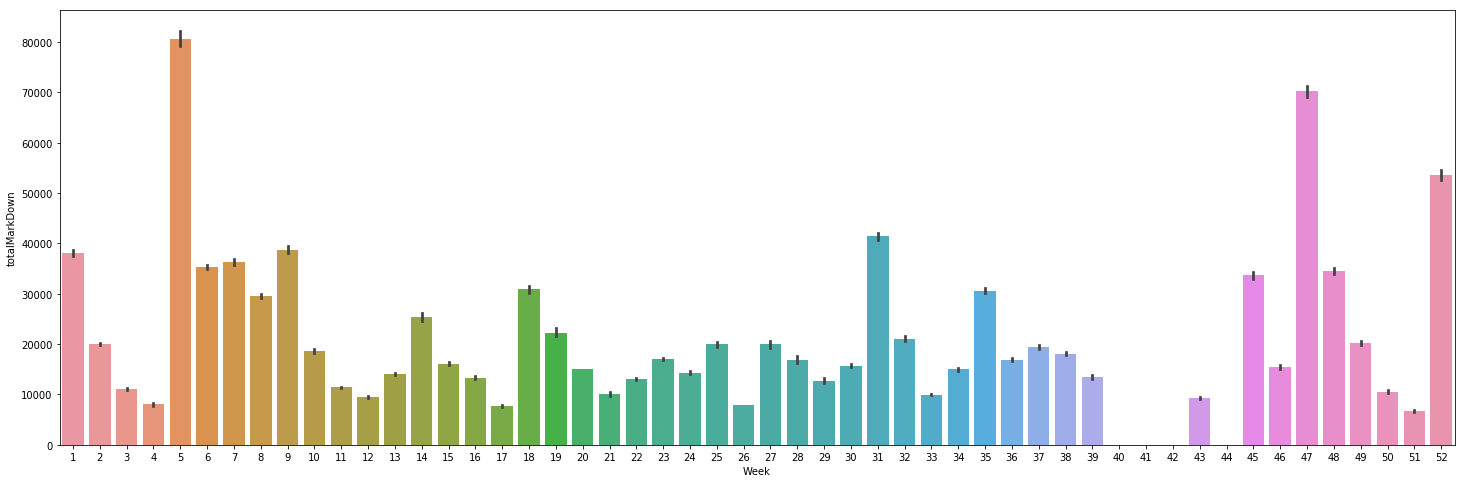

In [31]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.barplot(x='Week', y='totalMarkDown', data=dataset)

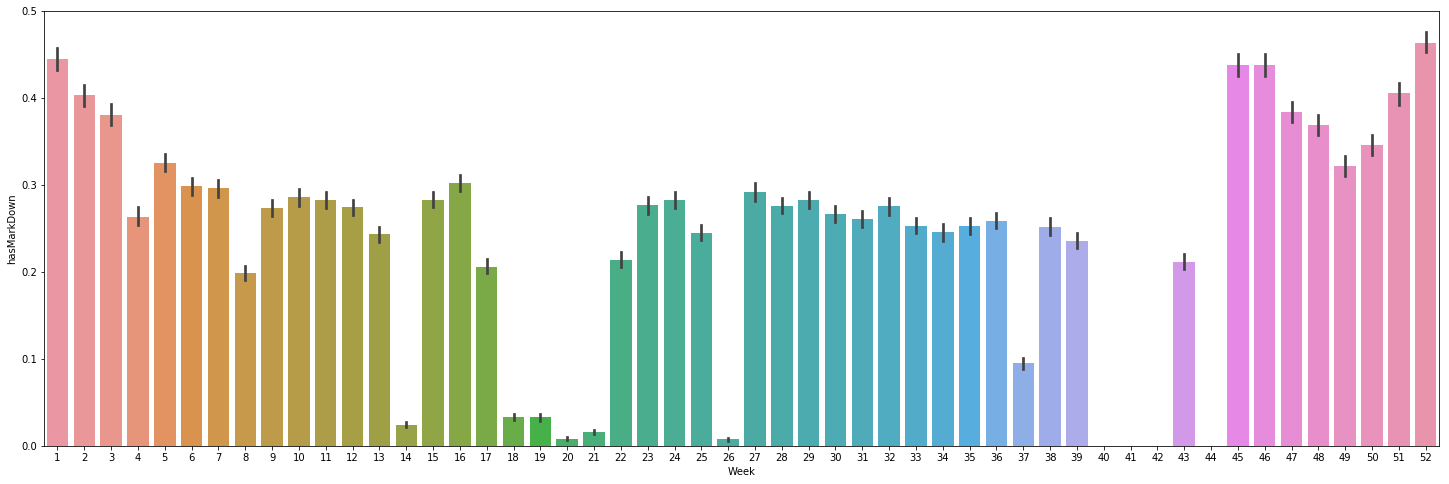

In [32]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.barplot(x='Week', y='hasMarkDown', data=dataset)

Most weeks Walmart stores have some kinds of mark down.

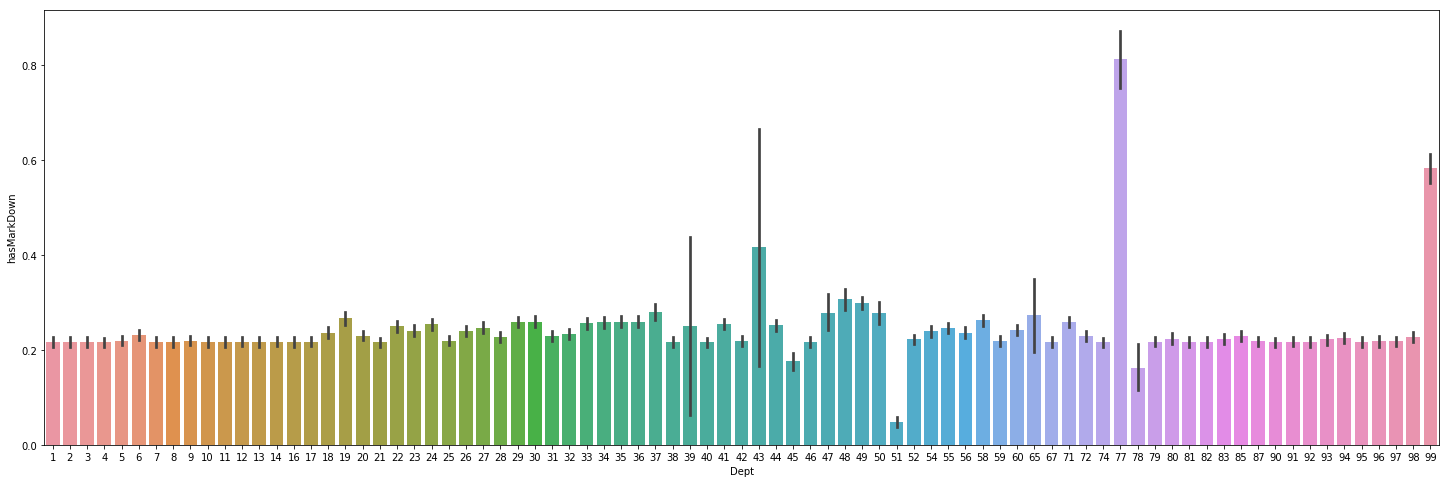

In [33]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.barplot(x='Dept', y='hasMarkDown', data= dataset)

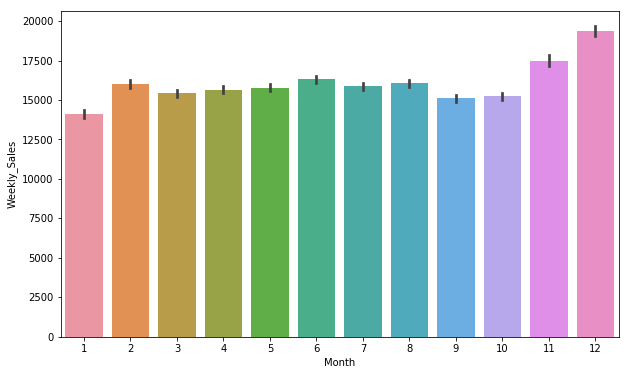

In [34]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.barplot(x='Month', y='Weekly_Sales', data=dataset)

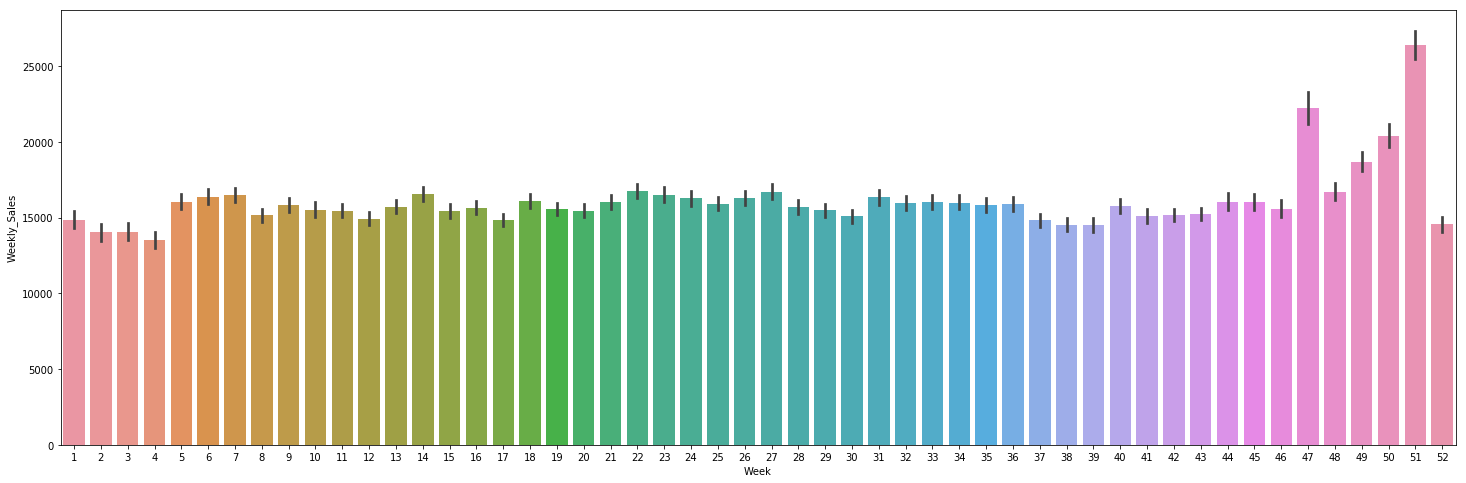

In [35]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=dataset)

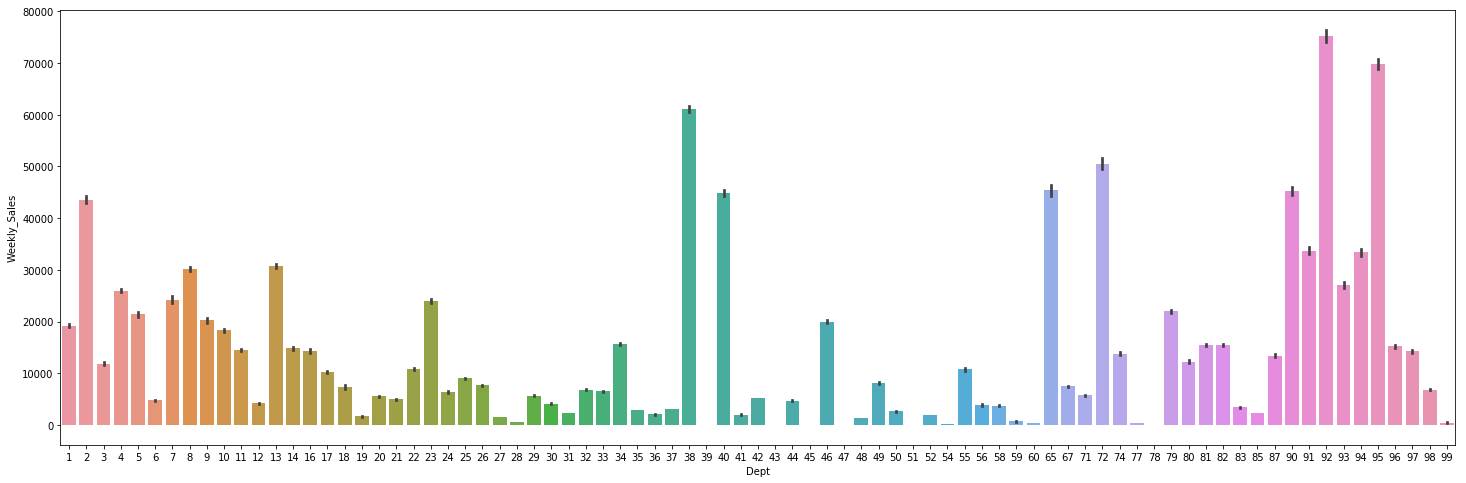

In [36]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data= dataset)

In [37]:
def sns_plot_data(data, columns, ylabel):
    for col in columns:
        sns.scatterplot(data[col],data[ylabel],hue=data['IsHoliday']);
 

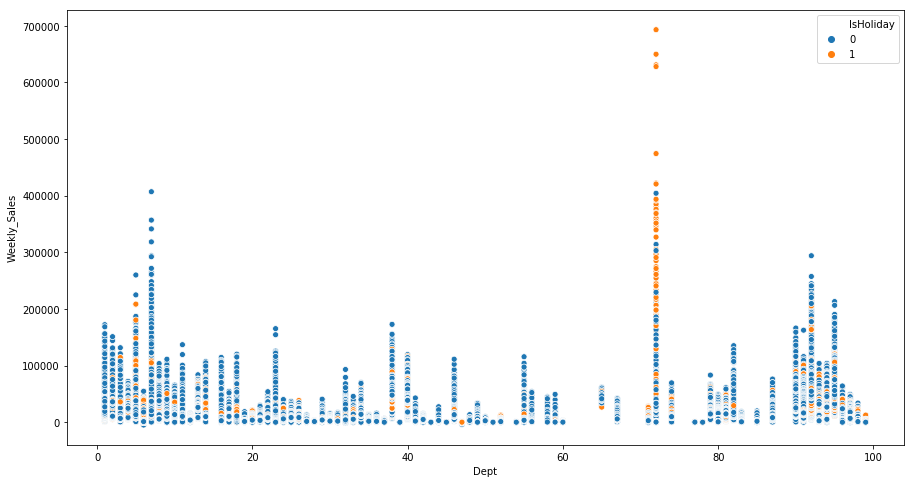

In [38]:
f, ax = plt.subplots(figsize=(15, 8))
sns_plot_data(dataset, ['Dept'], 'Weekly_Sales')

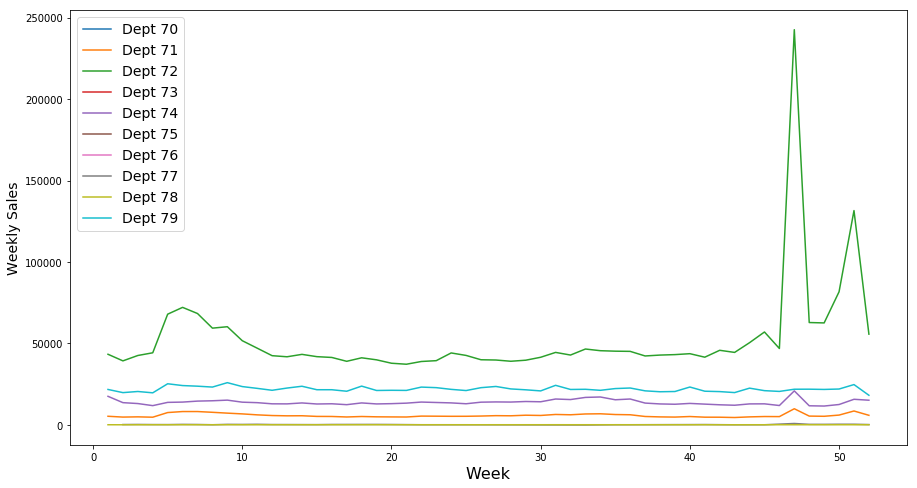

In [39]:
fig, ax = plt.subplots( figsize=(15,8)) 
 
data = dataset.groupby(['Week','Dept']).mean().reset_index() 
data=data[['Dept','Week','Weekly_Sales']]
for i in range(70,80) :
    store=data[data['Dept']==i]
 
    plt.plot(store['Week'], store['Weekly_Sales'], label='Dept %s'%i )
    plt.legend(loc='best',fontsize='14')
    plt.ylabel('Weekly Sales',fontsize='14')
    plt.xlabel('Week',fontsize='16')

As we can see from the above figures, department 72 has big weekly sales increases during Thanksgiving and Christmas holiday weeks. Thanksgiving week almost has 5 folds weekly sale increase.

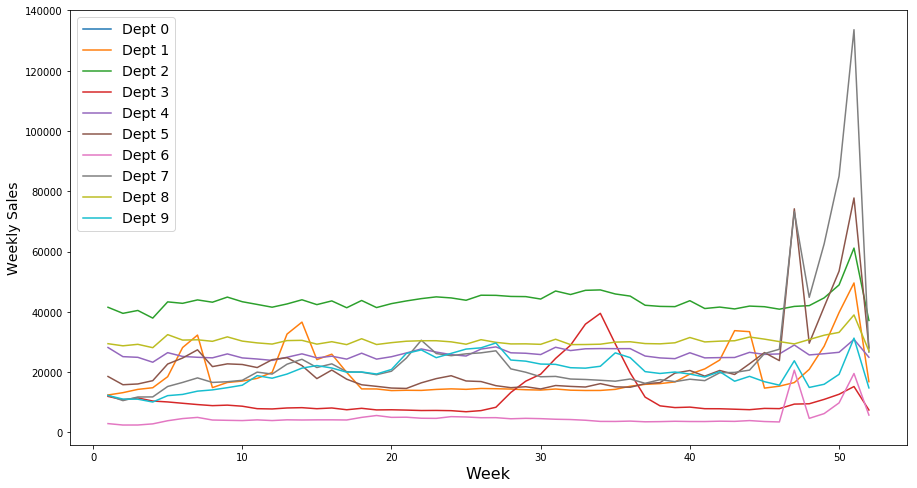

In [65]:
fig, ax = plt.subplots( figsize=(15,8)) 
 
data = dataset.groupby(['Week','Dept']).mean().reset_index() 
data=data[['Dept','Week','Weekly_Sales']]
for i in range(0,10) :
    store=data[data['Dept']==i]
 
    plt.plot(store['Week'], store['Weekly_Sales'], label='Dept %s'%i )
    plt.legend(loc='best',fontsize='14')
    plt.ylabel('Weekly Sales',fontsize='14')
    plt.xlabel('Week',fontsize='16')

Department 7 has a huge sales increase during Thanksgiving and Christmas holding week. Department 3 have a very dramatic weekly sales increase around Labor day holiday weeks.

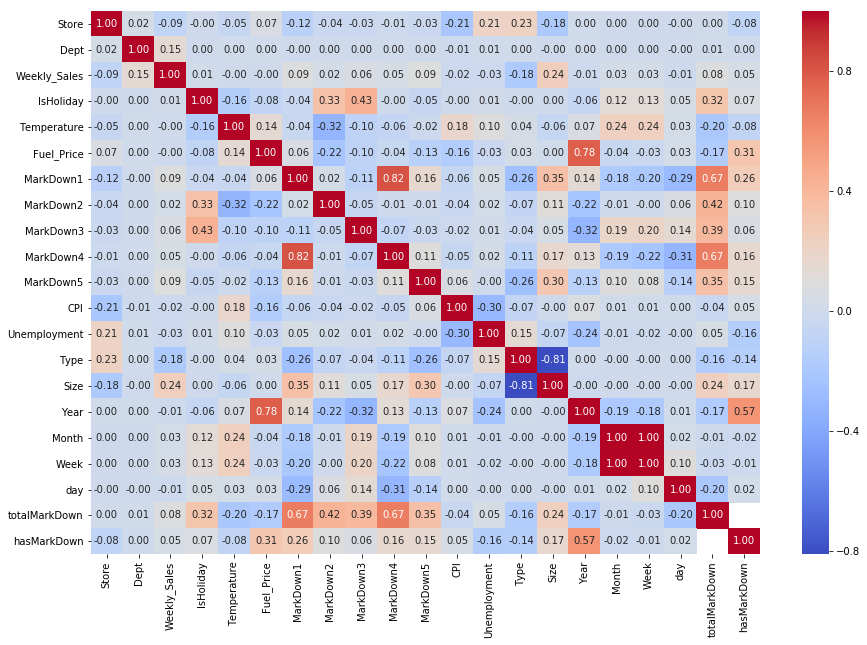

In [40]:
corr = dataset.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm' )

Some interesting observations from the above figure:
    * MarkDown1 has a strong correlate with MarkDown4.
    * Fuel_price has a strong correlate with Year.
    * MarkDown2 and MarkDown3 are strongly correlated with IsHoliday.
    * Weekly_Sales strong correlates with Size and Department.
 

## Training

Fill NaN with 0

In [41]:
dataset  = dataset.fillna(0)
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,Year,Month,Week,day,totalMarkDown,hasMarkDown
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,...,211.096358,8.106,0,151315,2010,2,5,5,0.0,0
1,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,...,211.242170,8.106,0,151315,2010,2,6,12,0.0,0
2,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,...,211.289143,8.106,0,151315,2010,2,7,19,0.0,0
3,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,...,211.319643,8.106,0,151315,2010,2,8,26,0.0,0
4,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,...,211.350143,8.106,0,151315,2010,3,9,5,0.0,0


In [42]:
x_data = dataset.drop('Weekly_Sales',axis=1)
y_data = dataset['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, shuffle=True, random_state=100) 

In [43]:
myLR = LinearRegression()
myLR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
train_pred= myLR.predict(x_train)
r2_score(y_train,train_pred)
 

0.08740564240307713

LinearRegression does poorly in predicting walmart store weekly sales.

In [45]:
myForest=RandomForestRegressor()
myForest.fit(x_train, y_train)

C:\Users\yougui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
train_pred=myForest.predict(x_train)
r2_score(y_train,train_pred)

0.9948776744562294

In [47]:
test_pred=myForest.predict(x_test)
r2_score(y_test,test_pred)

0.9766381143436986

In [107]:
def WMAE(y_actual, y_predicted, dataset):
    y_actual = y_actual.to_numpy()
 
    W = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    W = W.to_numpy()
    return (1/np.sum(W))*np.sum(W*np.abs(y_actual-y_predicted))
 

In [108]:
wame = WMAE(y_test,test_pred,x_test )
wame

1615.5676554865806

## Forecasting

In [51]:
test = pd.read_csv("./test.csv")
features = pd.read_csv("./features.csv")
stores = pd.read_csv("./stores.csv")
test_features = pd.merge(test, features, on = ['Store', 'Date', 'IsHoliday'], how='left')
test_dataset = test_features.merge(stores, how = 'left') 
test_dataset = test_dataset.merge(stores, how='left').merge(features, how='left')

In [52]:
test_dataset.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [53]:
test_dataset['Date']=pd.to_datetime(test_dataset['Date'])
test_dataset['Year'] = test_dataset['Date'].dt.year
test_dataset['Month'] = test_dataset['Date'].dt.month
test_dataset['Week'] = test_dataset['Date'].dt.week
test_dataset['day'] = test_dataset['Date'].dt.day
date = test_dataset['Date']
del test_dataset['Date']

In [54]:
test_dataset['Type']=LabelEncoder().fit_transform(test_dataset['Type'])
test_dataset['IsHoliday']=LabelEncoder().fit_transform(test_dataset['IsHoliday'])

In [55]:
test_dataset['totalMarkDown'] =   test_dataset['MarkDown1'] + dataset['MarkDown2'] \
                                    + dataset['MarkDown3']+ dataset['MarkDown4']+ dataset['MarkDown5']   

In [56]:
test_dataset['hasMarkDown'] = test_dataset['totalMarkDown'].apply(lambda x :  1 if x >1 else   0)

In [57]:
test_dataset = test_dataset.fillna(0)

In [58]:
predicted_test = myForest.predict(test_dataset)

In [61]:
#predicted_test = myForest.predict(test_dataset)
#predicted_test = newForest.predict(new_test_dataset)
predicted_test = myForest.predict(test_dataset)
#predicted_test = ada_dt.predict(new_test_dataset)
#predicted_test = ada_dt_best.predict(new_test_dataset)

In [62]:
test_forcasting = pd.DataFrame()
test_dataset['Date'] = date
test_forcasting['Id'] = test_dataset['Store'].astype(str) + '_' +  test_dataset['Dept'].astype(str) + '_' +  test_dataset['Date'].astype(str)
test_forcasting['weekly_Sales'] = predicted_test
test_forcasting.round(2).head()

,Id,weekly_Sales
0,1_1_2012-11-02,29659.73
1,1_1_2012-11-09,22064.91
2,1_1_2012-11-16,21351.17
3,1_1_2012-11-23,20681.91
4,1_1_2012-11-30,35836.17


In [63]:
test_forcasting.round(2).tail()

,Id,weekly_Sales
115059,45_98_2013-06-28,351.80
115060,45_98_2013-07-05,434.21
115061,45_98_2013-07-12,499.54
115062,45_98_2013-07-19,485.84
115063,45_98_2013-07-26,384.42


In [64]:
test_forcasting.round(2).to_csv('output.csv',index=False)